<a href="https://colab.research.google.com/github/DerivativeJRM07/gaming_data_analysis/blob/main/gaming_data_preprocessing_%26_outliner_treatment_jrm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Pre-Processing & Outlinear Treatment***
---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Gaming_data_analysis_jrm/gaming_data_ready_for_eda.csv')

In [4]:
print(df.columns)

Index(['age', 'gender', 'occupation', 'game_type', 'daily_gaming_hours',
       'peak_time', 'sleep_hours', 'stress_level', 'focus_level',
       'performance', 'productivity_level', 'performance_impact',
       'impact_score', 'health_index', 'gamer_type'],
      dtype='object')


### **Step 1:-**  *Outliner Detection ("the BOXPLOT method") (finding odd one out)*
Before we delete anything, we must identify if outliers even exist. We use Boxplots because they visually highlight points that are mathematically "too far" from the average.
Imagine two students in a class: one who plays games for 24 hours straight and one who sleeps for 20 hours. These aren't "normal" students. They are Outliers.

- What we do: We use a Boxplot to draw a "box" around the normal students.

- The Result: Any student standing far away from that box is a "dot" we need to investigate.

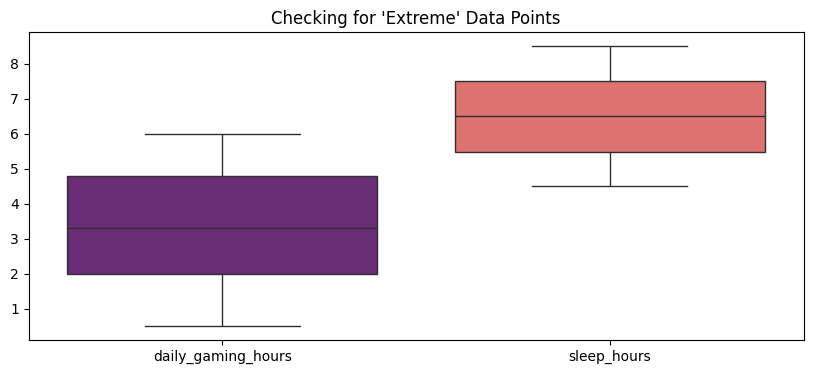

In [9]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['daily_gaming_hours', 'sleep_hours']], palette="magma")
plt.title("Checking for 'Extreme' Data Points")
plt.show()

### **Step 2:-** *Outlier Removal (The IQR Method)(cleaning)*

Once you've seen the outliers, we use the Interquartile Range (IQR) to remove them. This is the professional way to "clean" the data without just guessing which rows to delete.

- What we do: It’s like setting a "minimum" and "maximum" limit for the classroom.

- The Result: If a student’s gaming hours are higher than our limit, we politely ask them to leave the dataset so they don't mess up our average score.

In [12]:
Q1 = df['daily_gaming_hours'].quantile(0.25)
Q3 = df['daily_gaming_hours'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

### **Step 3:-** *Translating for the Computer (Encoding)*

Computers are smart, but they are like calculators—they don't know what "Male" or "Female" means. They only know numbers.

- What we do: We give every word a ID number.

      "Male" = 0

      "Female" = 1

- The Result: Now the computer can do math with your data!

In [13]:
df_clean = df[(df['daily_gaming_hours'] >= lower_limit) & (df['daily_gaming_hours'] <= upper_limit)]

print(f"I removed {len(df) - len(df_clean)} extreme rows to make your data perfect!")

I removed 0 extreme rows to make your data perfect!


In [22]:
from sklearn.preprocessing import LabelEncoder

# 1. Open the 'Tagging Tool'
le = LabelEncoder()

# 2. change the Genders (Male/Female -> 0/1)
df['gender_n'] = le.fit_transform(df['gender'])

# 3. change the Gamer Types (Casual/Hardcore -> 0, 1, 2, etc.)
df['gamer_type_n'] = le.fit_transform(df['gamer_type'])

df.head()

,age,gender,occupation,game_type,daily_gaming_hours,peak_time,sleep_hours,stress_level,focus_level,performance,productivity_level,performance_impact,impact_score,health_index,gamer_type,gender_n,gamer_type_n
0,21,Male,Working Professional,Action,4.0,Morning,4.6,6,4,69,66,Negative,0,4.30,Regular,1,1
1,35,Female,Student,Sports,1.0,Night,5.4,2,7,67,72,Neutral,1,6.70,casual,0,2
2,26,Male,Student,Puzzle,2.0,Morning,8.0,4,8,82,82,Positive,2,7.00,casual,1,2
3,32,Male,Working Professional,Action,1.0,Night,4.9,7,7,71,66,Neutral,1,3.95,casual,1,2
4,19,Male,Working Professional,Action,2.1,Morning,7.0,7,7,67,63,Neutral,1,5.00,Regular,1,1


      - The Tool: LabelEncoder is like a translator that turns words into a "computer-friendly" math language.

      - The New Columns: You didn't lose your original words; you just added two new columns (gender_n and gamer_type_n) that have numbers in them.

      - The Purpose: Now, your data is 100% ready for the computer to start making predictions.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   int64  
 1   gender              1000 non-null   object 
 2   occupation          1000 non-null   object 
 3   game_type           1000 non-null   object 
 4   daily_gaming_hours  1000 non-null   float64
 5   peak_time           1000 non-null   object 
 6   sleep_hours         1000 non-null   float64
 7   stress_level        1000 non-null   int64  
 8   focus_level         1000 non-null   int64  
 9   performance         1000 non-null   int64  
 10  productivity_level  1000 non-null   int64  
 11  performance_impact  1000 non-null   object 
 12  impact_score        1000 non-null   int64  
 13  health_index        1000 non-null   float64
 14  gamer_type          1000 non-null   object 
 15  gender_n            1000 non-null   int64  
 16  gamer_t

In [23]:
df.to_csv('gaming_data_ready_to_ML_data_preprocessing.csv', index=False)

print("Success! Your new CSV file is ready.")

Success! Your new CSV file is ready.
